### Курсовой проект

In [372]:
import numpy as np
import pandas as pd
import random
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [373]:
def evaluate_preds(train_true_values, train_pred_values, val_true_values, val_pred_values):
    """
    Функция для оценки работы модели
    Parameters:
    train_true_values - целевая переменная из тренировочной части датасета
    train_pred_values - предсказания модели по тренировочной части
    val_true_values - целевая переменная из валидационной части датасета
    val_pred_values - предсказания модели по валидационной части
    Returns:
    R2 на тренировочной и валидационной части, 
    графики зависимости истинных значений от предсказаний
    """
    print("Train R2:\t" + str(round(r2_score(train_true_values, train_pred_values), 3)))
    print("Valid R2:\t" + str(round(r2_score(val_true_values, val_pred_values), 3)))
    
    plt.figure(figsize=(12,7))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=val_pred_values, y=val_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')
    plt.show()

**Загрузка данных из файлов**

In [374]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [375]:
train_data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [376]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [377]:
train_data.shape

(10000, 20)

In [378]:
test_data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [379]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 742.3+ KB


In [380]:
test_data.shape

(5000, 19)

**Просмотр распределения целевой переменной**

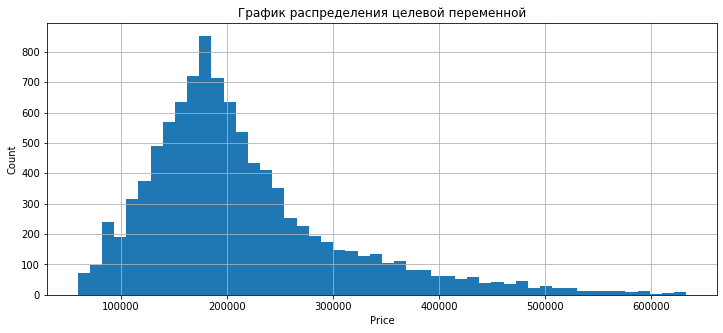

In [381]:
plt.figure(figsize = (12, 5))
train_data['Price'].hist(bins=50)
plt.ylabel('Count')
plt.xlabel('Price')
plt.title('График распределения целевой переменной')
plt.show()

### Обработка данных

**Обработка пропусков**

Параметр LifeSquare с пропусками, заполним его медианой

In [382]:
lifesquare_median = train_data['LifeSquare'].median()
train_data['LifeSquare'] = train_data['LifeSquare'].fillna(lifesquare_median)
test_data['LifeSquare'] = test_data['LifeSquare'].fillna(lifesquare_median)

Параметр Healthcare_1 с пропусками, заполним медианой

In [383]:
Healthcare_1_median = train_data['Healthcare_1'].median()
train_data['Healthcare_1'] = train_data['Healthcare_1'].fillna(Healthcare_1_median)
test_data['Healthcare_1'] = test_data['Healthcare_1'].fillna(Healthcare_1_median)

In [384]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       5000 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     5000 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 742.3+ KB


**Обработка не числовых параметров**

Параметры Ecology_2, Ecology_3, Shops_2 не числовые. Т.к. их значения имеют всего два варианта 'A' или 'B', то мы сможем заменить их значения на числовые и сделать dummy-переменные

In [385]:
train_data['Ecology_2'].unique()

array(['B', 'A'], dtype=object)

In [386]:
train_data['Ecology_2'] = train_data['Ecology_2'].replace({'A':0, 'B':1})
test_data['Ecology_2'] = test_data['Ecology_2'].replace({'A':0, 'B':1})

In [387]:
train_data['Ecology_3'].unique()

array(['B', 'A'], dtype=object)

In [388]:
train_data['Ecology_3'] = train_data['Ecology_3'].replace({'A':0, 'B':1})
test_data['Ecology_3'] = test_data['Ecology_3'].replace({'A':0, 'B':1})

In [389]:
train_data['Shops_2'].unique()

array(['B', 'A'], dtype=object)

In [390]:
train_data['Shops_2'] = train_data['Shops_2'].replace({'A':0, 'B':1})
test_data['Shops_2'] = test_data['Shops_2'].replace({'A':0, 'B':1})

**Уберём ненужный индекс, сделаем его по полю Id**

In [391]:
train_data = train_data.set_index('Id')
test_data = test_data.set_index('Id')

**Просмотр статистической информации**

In [392]:
train_data.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,50.400800,1.890500,56.315775,36.266040,6.273300,8.526700,12.609400,3.990166e+03,0.118858,0.990300,0.972500,24.687000,5352.157400,8.039200,1026.358900,1.319500,4.231300,0.917500,214138.857399
std,43.587592,0.839512,21.058732,76.609981,28.560917,5.241148,6.775974,2.005003e+05,0.119025,0.098015,0.163543,17.532614,4006.799803,23.831875,746.662828,1.493601,4.806341,0.275139,92872.293865
min,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,20.000000,1.000000,41.774881,25.527399,1.000000,4.000000,9.000000,1.974000e+03,0.017647,1.000000,1.000000,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,1.000000,153872.633942
50%,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,1.000000,1.000000,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,1.000000,192269.644879
75%,75.000000,2.000000,65.900625,41.427234,9.000000,12.000000,17.000000,2.001000e+03,0.195781,1.000000,1.000000,36.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,1.000000,249135.462171
max,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000,633233.466570


**Обработка выбросов**

**Rooms**

In [393]:
train_data['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [394]:
train_data.loc[train_data['Rooms'].isin([0, 19]), 'Rooms'] = train_data['Rooms'].median()

**Square, LifeSquare, KitchenSquare**

In [395]:
train_data = train_data[train_data['Square'].isnull() |
                    (train_data['Square'] < train_data['Square'].quantile(.99)) &
                    (train_data['Square'] > train_data['Square'].quantile(.01))]

train_data = train_data[train_data['LifeSquare'].isnull() |
                    (train_data['LifeSquare'] < train_data['LifeSquare'].quantile(.99)) &
                    (train_data['LifeSquare'] > train_data['LifeSquare'].quantile(.01))]

train_data = train_data[train_data['KitchenSquare'].isnull() |
                    (train_data['KitchenSquare'] < train_data['KitchenSquare'].quantile(.99)) &
                    (train_data['KitchenSquare'] > train_data['KitchenSquare'].quantile(.01))]

In [396]:
train_data.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
count,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8.848000e+03,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000
mean,52.190212,1.885285,54.734456,34.420440,6.089512,8.439873,12.819507,4.250881e+03,0.119672,0.989941,0.969824,26.106126,5636.478865,8.366297,1039.409245,1.394100,4.436144,0.929815,214855.187974
std,44.543009,0.806087,16.164725,12.717369,3.498116,5.128682,6.353040,2.131535e+05,0.119673,0.099793,0.171082,17.267244,3977.972421,24.173064,770.862595,1.491651,4.825050,0.255474,89603.516533
min,0.000000,1.000000,29.719934,3.512299,1.000000,1.000000,0.000000,1.914000e+03,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,20.000000,1.000000,41.627579,24.709710,1.000000,4.000000,9.000000,1.972000e+03,0.017647,1.000000,1.000000,11.000000,2370.000000,0.000000,810.000000,0.000000,1.000000,1.000000,156895.897557
50%,40.000000,2.000000,51.622306,32.781260,6.000000,7.000000,14.000000,1.977000e+03,0.075779,1.000000,1.000000,25.000000,5562.000000,2.000000,900.000000,1.000000,3.000000,1.000000,194169.421353
75%,80.000000,2.000000,64.624549,41.052147,9.000000,12.000000,17.000000,2.000000e+03,0.194812,1.000000,1.000000,36.000000,7614.000000,5.000000,1036.000000,3.000000,6.000000,1.000000,250272.052869
max,209.000000,10.000000,117.855969,85.724112,14.000000,42.000000,117.000000,2.005201e+07,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000,633233.466570


In [397]:
train_data.loc[train_data['LifeSquare'] < 7, 'LifeSquare'] = 7
train_data.loc[train_data['KitchenSquare'] < 4, 'KitchenSquare'] = 4

**HouseFloor, Floor**

In [398]:
train_data['Floor'].value_counts()

4     835
5     792
3     778
6     726
7     679
8     576
9     529
2     519
10    494
11    409
12    394
13    360
14    313
15    253
16    248
17    223
1     203
18    164
19    102
20     54
21     50
22     44
24     42
25     23
23     20
26      9
27      3
28      2
32      1
33      1
42      1
31      1
Name: Floor, dtype: int64

In [399]:
train_data['HouseFloor'].value_counts()

17.0     2047
9.0      1344
12.0     1020
5.0       991
14.0      621
16.0      558
1.0       428
22.0      312
25.0      300
24.0      154
8.0       136
10.0      121
4.0       105
15.0       99
20.0       88
19.0       83
3.0        74
18.0       72
7.0        53
6.0        46
23.0       37
2.0        29
21.0       28
13.0       26
11.0       24
30.0       18
0.0        14
27.0        5
32.0        3
40.0        2
99.0        2
28.0        1
48.0        1
37.0        1
29.0        1
44.0        1
26.0        1
45.0        1
117.0       1
Name: HouseFloor, dtype: int64

In [400]:
train_data.loc[train_data['HouseFloor'] == 0, 'HouseFloor'] = train_data['HouseFloor'].median()

In [401]:
floor_outliers = train_data[train_data['Floor'] > train_data['HouseFloor']].index
train_data.loc[floor_outliers, 'Floor'] = train_data.loc[floor_outliers, 'HouseFloor'].apply(lambda x: random.randint(1, x))

**HouseYear**

In [402]:
train_data['HouseYear'].sort_values().unique()

array([    1914,     1916,     1917,     1918,     1919,     1928,
           1929,     1930,     1931,     1932,     1933,     1934,
           1935,     1936,     1937,     1938,     1939,     1940,
           1941,     1942,     1947,     1948,     1950,     1951,
           1952,     1953,     1954,     1955,     1956,     1957,
           1958,     1959,     1960,     1961,     1962,     1963,
           1964,     1965,     1966,     1967,     1968,     1969,
           1970,     1971,     1972,     1973,     1974,     1975,
           1976,     1977,     1978,     1979,     1980,     1981,
           1982,     1983,     1984,     1985,     1986,     1987,
           1988,     1989,     1990,     1991,     1992,     1993,
           1994,     1995,     1996,     1997,     1998,     1999,
           2000,     2001,     2002,     2003,     2004,     2005,
           2006,     2007,     2008,     2009,     2010,     2011,
           2012,     2013,     2014,     2015,     2016,     2

In [403]:
train_data.loc[train_data['HouseYear'] == 20052011, 'HouseYear'] = 2005

In [404]:
train_data.isnull().sum()

DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
Price            0
dtype: int64

**Создание новых признаков**

In [405]:
# district_size = train_data['DistrictId'].value_counts().reset_index().rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})

# district_size.head()

**Разбиение train_data**

In [406]:
features = train_data.columns.tolist()
y = train_data['Price']
features.remove('Price')
# features.remove('DistrictID')
x = train_data[features]

In [407]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=32)

**Обучение модели**

In [408]:
model = RandomForestRegressor(random_state=33)
model.fit(x_train, y_train)

/home/user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=33, verbose=0,
                      warm_start=False)

In [409]:
y_train_preds = model.predict(x_train)
y_test_preds = model.predict(x_test)

Train R2:	0.948
Valid R2:	0.674


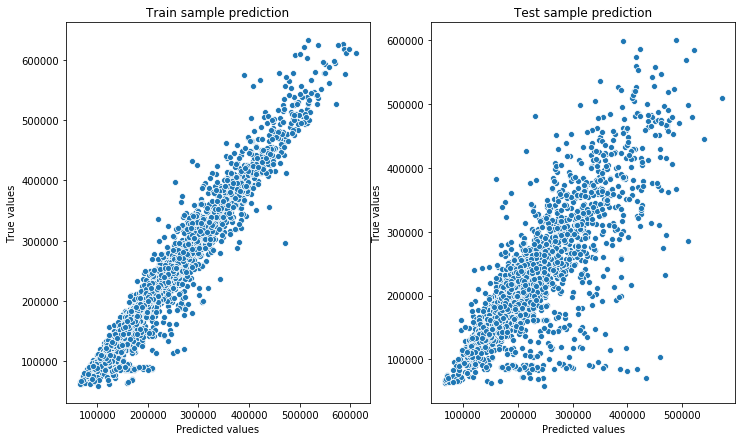

In [410]:
evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

In [411]:
test_data['Price'] = model.predict(test_data)
test_data.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,1,1,11,2748,1,900.0,0,0,1,175096.600843
15856,74,2.0,69.263183,32.781260,1.0,6,1.0,1977,0.075779,1,1,6,1437,3,900.0,0,2,1,232810.706555
5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,1,1,30,7538,87,4702.0,5,5,1,238500.544571
15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,1,1,23,4583,3,900.0,3,3,1,363046.090259
14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,1,1,2,629,1,900.0,0,0,0,138081.942552


In [417]:
test_data.reset_index(inplace=True)
test_data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,1,1,11,2748,1,900.0,0,0,1,175096.600843
1,15856,74,2.0,69.263183,32.781260,1.0,6,1.0,1977,0.075779,1,1,6,1437,3,900.0,0,2,1,232810.706555
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,1,1,30,7538,87,4702.0,5,5,1,238500.544571
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,1,1,23,4583,3,900.0,3,3,1,363046.090259
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,1,1,2,629,1,900.0,0,0,0,138081.942552


In [418]:
test_data.loc[:, ['Id', 'Price']].to_csv('out_baseline.csv', index=False)